# Linear Regression - Usando a Equação e SGD

Paulo Cysne Rios Jr. | Novembro 2017

Neste exemplo faremos uma comparação dos diferentes métodos de regressão linear.

Faça o pequeno exercício ao final deste exemplo.

In [1]:
import numpy as np

## 1. Criando a função real com números aleatórios

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X  # sem ruído

In [3]:
y = 4 + 3 * X + np.random.randn(100, 1) # com ruído

In [4]:
X[:5]

array([[ 1.39251158],
       [ 0.7782509 ],
       [ 1.57059857],
       [ 1.7369737 ],
       [ 0.92745042]])

In [5]:
y[:5]

array([[ 7.67043413],
       [ 6.85376166],
       [ 9.60288508],
       [ 7.15400372],
       [ 5.6281498 ]])

In [6]:
import matplotlib.pyplot as plt

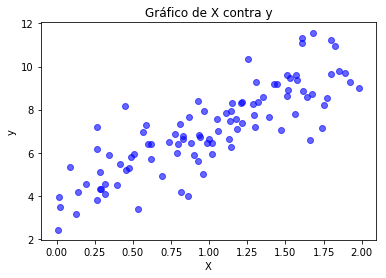

In [7]:
plt.scatter(X, y, color = "blue", alpha = 0.6)
plt.title("Gráfico de X contra y")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## 2. Usando a equação de custo minimizado

### 2.1 Calculando os coeficientes

In [8]:
# Acrescente x0 = 1 para cada instância
X_b = np.c_[np.ones((100, 1)), X]

In [9]:
X_b[:5]

array([[ 1.        ,  1.39251158],
       [ 1.        ,  0.7782509 ],
       [ 1.        ,  1.57059857],
       [ 1.        ,  1.7369737 ],
       [ 1.        ,  0.92745042]])

In [10]:
# Usando a equação para custo minimizado
theta_best_formula = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best_formula

array([[ 3.91024456],
       [ 3.1623039 ]])

### 2.2 Fazendo predições com o modelo

In [12]:
X_new = np.array([[0], [2]])

In [13]:
X_new

array([[0],
       [2]])

In [14]:
# Acrescente um para cada instância
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [15]:
X_new_b

array([[ 1.,  0.],
       [ 1.,  2.]])

In [18]:
y_predict = X_new_b.dot(theta_best_formula)

In [19]:
y_predict

array([[  3.91024456],
       [ 10.23485236]])

### 2.3 Plotando as predições do modelo

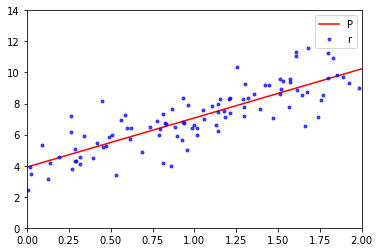

In [20]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.", alpha = 0.7)
plt.axis([0, 2, 0, 14])
plt.legend("Predictions")
plt.show()

## 3. Usando Scikit-Learn

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lg = LinearRegression()

In [23]:
lg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
theta_best_LR_class = lg.intercept_, lg.coef_

In [25]:
theta_best_LR_class

(array([ 3.91024456]), array([[ 3.1623039]]))

### 3.1 Fazendo predições

In [26]:
lg.predict(X_new)

array([[  3.91024456],
       [ 10.23485236]])

## 4. Usando Batch Gradient Descent

In [27]:
eta = 0.1 # taxa de aprendizagem
n_iterations = 1000
m = 100

In [28]:
# Iniciação de theta aleatória
theta = np.random.randn(2,1)

In [29]:
theta

array([[-1.53643078],
       [-1.22493252]])

In [30]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients

In [31]:
theta_batch_gd = theta

In [32]:
theta_batch_gd

array([[ 3.91024456],
       [ 3.1623039 ]])

Valores de theta são os mesmos obtidos pela equação de minimização!

## 5. Usando Stochastic Gradient Descent (Descida de Gradiente Estocástica)

In [33]:
n_epochs = 50
t0, t1 = 5, 50 # hiperparameteros do plano de aprendizagem

In [34]:
def learning_schedule(t): 
    return t0/(t+t1)

In [35]:
theta = np.random.randn(2,1) # inicialização aleatória

In [36]:
for epoch in range(n_epochs): 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [37]:
theta_stochastic_gd = theta

In [38]:
theta_stochastic_gd

array([[ 3.91025522],
       [ 3.12881077]])

Enquanto o código Batch Gradient Descent iterou 1000 vezes através de todo o conjunto de treinamentos, este código passa pelo conjunto de treinamento apenas 50 vezes e atinge uma solução bastante boa!

## 6. Usando Stochastic Gradient Descent com Scikit-Learn

In [39]:
from sklearn.linear_model import SGDRegressor

In [46]:
sgd_m = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)

In [47]:
sgd_m.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [48]:
theta_SGDRegressor_class = sgd_m.intercept_, sgd_m.coef_

In [49]:
theta_SGDRegressor_class

(array([ 3.93654329]), array([ 3.20754023]))

## 7. Comparação

In [50]:
theta_best_formula

array([[ 3.91024456],
       [ 3.1623039 ]])

In [51]:
theta_best_LR_class

(array([ 3.91024456]), array([[ 3.1623039]]))

In [52]:
theta_batch_gd

array([[ 3.91024456],
       [ 3.1623039 ]])

In [53]:
theta_stochastic_gd

array([[ 3.91025522],
       [ 3.12881077]])

In [54]:
theta_SGDRegressor_class

(array([ 3.93654329]), array([ 3.20754023]))

## 8. Exercício

- Coloque os resultados acima numa tabela
- Análise os resultados e faça uma comparação dos diferentes métodos.

In [63]:
import pandas as pd
theta_batch_gd[1][0]

3.1623039009665801

In [68]:
table_comp = pd.DataFrame({'Tipo': ['Real', 'LinearFormula', 'LinearModel', 'GDBatch', 'SGD', 'SGDModel'],
                          'Intercept': [4.0, theta_best_formula[0][0], theta_best_LR_class[0][0], theta_batch_gd[0][0], theta_stochastic_gd[0][0], theta_SGDRegressor_class[0][0] ],
                          'Coef': [3.0, theta_best_formula[1][0], theta_best_LR_class[1][0][0], theta_batch_gd[1][0], theta_stochastic_gd[1][0], theta_SGDRegressor_class[1][0]],
                          })

table_comp.set_index('Tipo')

,Coef,Intercept
Tipo,,
Real,3.000000,4.000000
LinearFormula,3.162304,3.910245
LinearModel,3.162304,3.910245
GDBatch,3.162304,3.910245
SGD,3.128811,3.910255
SGDModel,3.207540,3.936543
